In [3]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
churn_data = pd.read_csv("~/ChurnPrediction/Telco-Customer-Churn.csv")

churn_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Preparation

#### Checking for data-types and missing values

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
churn_data.isnull().sum().sum() #.sum() computes missing values per columns, but .sum().sum() gives overall count

0

#### Examine unique values for each column

In [7]:
# Get the number of unique values for each column
unique_counts = churn_data.nunique()
print("Number of unique values for each column:")
print(unique_counts)

Number of unique values for each column:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [8]:
# Get the unique values and data type for each column
for column in churn_data.columns:
    unique_values = churn_data[column].unique()
    data_type = churn_data[column].dtype
    print(f"\nColumn: {column}")
    print(f"Data type: {data_type}")
    print(f"Unique values: {unique_values}")


Column: customerID
Data type: object
Unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender
Data type: object
Unique values: ['Female' 'Male']

Column: SeniorCitizen
Data type: int64
Unique values: [0 1]

Column: Partner
Data type: object
Unique values: ['Yes' 'No']

Column: Dependents
Data type: object
Unique values: ['No' 'Yes']

Column: tenure
Data type: int64
Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService
Data type: object
Unique values: ['No' 'Yes']

Column: MultipleLines
Data type: object
Unique values: ['No phone service' 'No' 'Yes']

Column: InternetService
Data type: object
Unique values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Data type: object
Unique values: ['No' 'Yes' 'No internet service']


#### Removing Customer_ID column

In [9]:
print(churn_data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [10]:
churn_data = churn_data.drop('customerID', axis=1)

#### Data Clean - Convert "TotalCharges" to Numeric

In [11]:
# any non-numeric values in the TotalCharges column will be converted to NaN
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
churn_data[np.isnan(churn_data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### Data Cleaning - Dropping rows with tenure equal to 0

In [13]:
# Group by 'tenure' and count the number of entries in each group
tenure_counts = churn_data.groupby('tenure').size()

# Display the counts
tenure_counts

tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Length: 73, dtype: int64

In [14]:
churn_data.drop(labels=churn_data[churn_data['tenure'] == 0].index, axis=0, inplace=True)

tenure_counts = churn_data.groupby('tenure').size()
tenure_counts

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Length: 72, dtype: int64

In [15]:
# check NaN in "TotalCharges"
churn_data[np.isnan(churn_data['TotalCharges'])].index

Index([], dtype='int64')

In [16]:
# Cleaned Data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

### Data Visualization

#### Look at the percentage of "Churn"

/var/folders/7q/0pgbgf_52n58ml7cghywyjdr0000gn/T/ipykernel_4371/209891312.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=churn_data, x='Churn', palette='Set2', ax=axes[0])
/var/folders/7q/0pgbgf_52n58ml7cghywyjdr0000gn/T/ipykernel_4371/209891312.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_proportions, x='Churn', y='Proportion', palette='Set2', ax=axes[1])


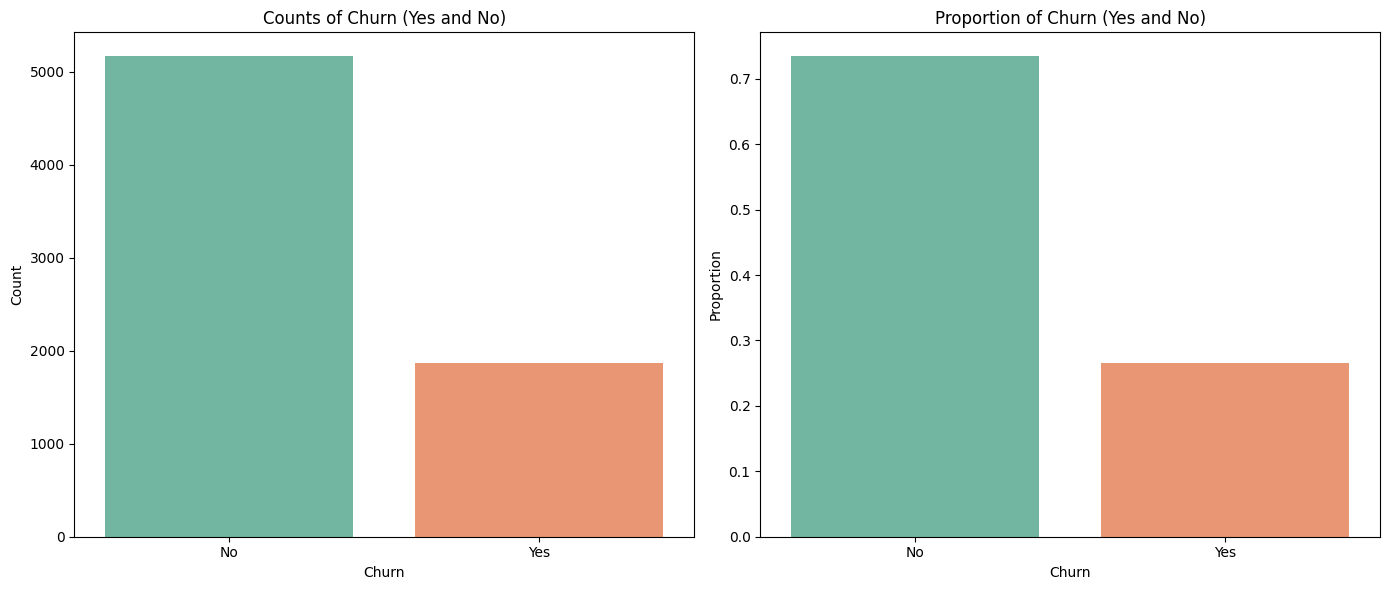

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate proportions
churn_proportions = churn_data['Churn'].value_counts(normalize=True).reset_index()
churn_proportions.columns = ['Churn', 'Proportion']

# Create a grid of plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Count plot for Churn
sns.countplot(data=churn_data, x='Churn', palette='Set2', ax=axes[0])
axes[0].set_title('Counts of Churn (Yes and No)')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

# Proportion plot for Churn
sns.barplot(data=churn_proportions, x='Churn', y='Proportion', palette='Set2', ax=axes[1])
axes[1].set_title('Proportion of Churn (Yes and No)')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Proportion')

# Adjust layout
plt.tight_layout()
plt.show()

#### Churn by 'Gender', 'SeniorCitizen', 'Partner', 'Dependents'

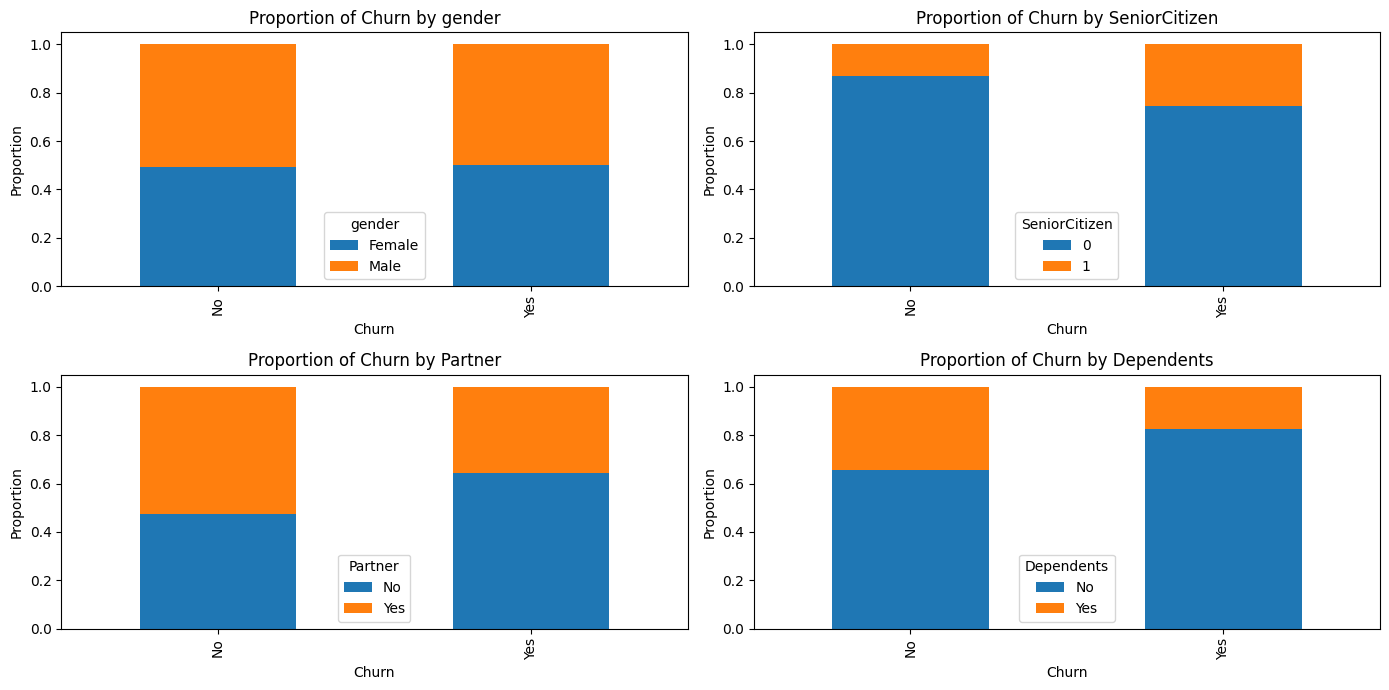

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of columns to plot
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Create a grid of bar plots
fig, axes = plt.subplots(2, 2, figsize=(14, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    # Calculate proportions
    crosstab = pd.crosstab(churn_data['Churn'], churn_data[column], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=['#1f77b4', '#ff7f0e'])
    
    axes[i].set_title(f'Proportion of Churn by {column}')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title=column)

# Adjust layout
plt.tight_layout()
plt.show()

#### Chi-Square Test for Two Categorical Variables

In [19]:
from scipy.stats import chi2_contingency

# List of columns to test
columns_to_test = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Perform Chi-square test for each column
for column in columns_to_test:
    # Create a contingency table
    contingency_table = pd.crosstab(churn_data['Churn'], churn_data[column])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results with interpretation
    print(f"Chi-square Test for {column}:")
    print(f"Chi-square Statistic: {chi2:.2f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-value: {p:.4f}")
    
    # Interpretation based on the p-value
    alpha = 0.05  # Common significance level
    if p < alpha:
        print(f"The p-value is less than 0.05, indicating a significant association between Churn and {column}.")
        print(f"This suggests that {column} may influence the likelihood of churn.\n")
    else:
        print(f"The p-value is greater than or equal to 0.05, indicating no significant association between Churn and {column}.")
        print(f"This suggests that {column} may not have a strong influence on churn.\n")

Chi-square Test for gender:
Chi-square Statistic: 0.48
Degrees of Freedom: 1
p-value: 0.4905
The p-value is greater than or equal to 0.05, indicating no significant association between Churn and gender.
This suggests that gender may not have a strong influence on churn.

Chi-square Test for SeniorCitizen:
Chi-square Statistic: 158.44
Degrees of Freedom: 1
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and SeniorCitizen.
This suggests that SeniorCitizen may influence the likelihood of churn.

Chi-square Test for Partner:
Chi-square Statistic: 157.50
Degrees of Freedom: 1
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and Partner.
This suggests that Partner may influence the likelihood of churn.

Chi-square Test for Dependents:
Chi-square Statistic: 186.32
Degrees of Freedom: 1
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and Dependent

#### Churn by 'Tenure'

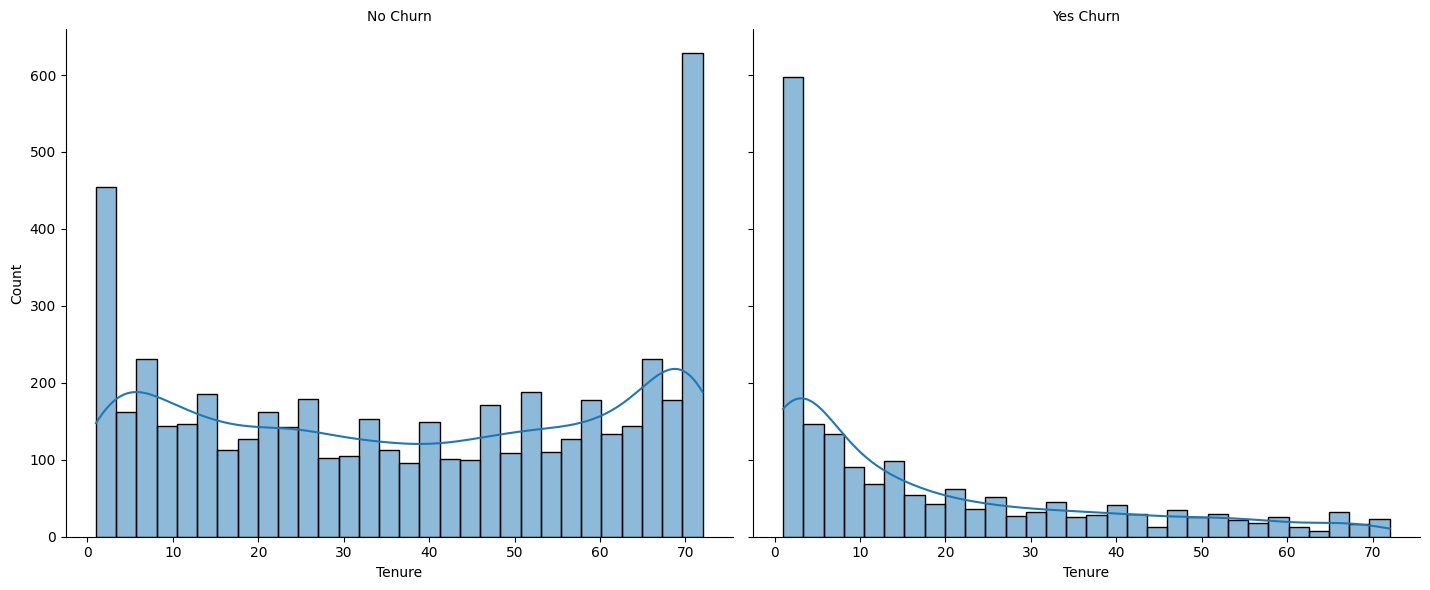

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid plot for tenure distribution by Churn
g = sns.FacetGrid(churn_data, col="Churn", height=6, aspect=1.2)
g.map(sns.histplot, "tenure", kde=True, bins=30)

# Add titles and labels
g.set_axis_labels("Tenure", "Count")
g.set_titles(col_template="{col_name} Churn")

plt.show()

#### Churn by 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection'

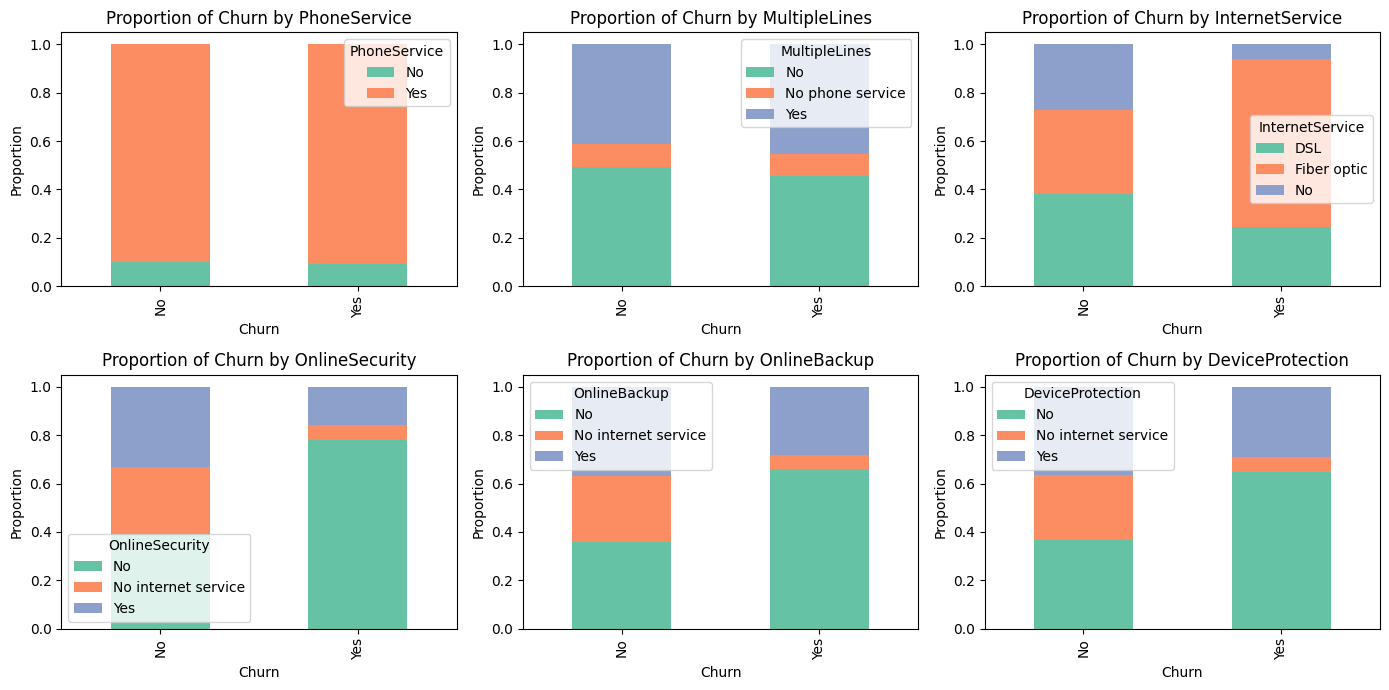

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of columns to plot
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection']

# Create a grid of bar plots
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    # Calculate proportions
    crosstab = pd.crosstab(churn_data['Churn'], churn_data[column], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=sns.color_palette("Set2"))
    
    axes[i].set_title(f'Proportion of Churn by {column}')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title=column)

# Adjust layout
plt.tight_layout()
plt.show()

#### Chi-Square Test for Two Categorical Variables

In [22]:
from scipy.stats import chi2_contingency

# List of columns to test
columns_to_test = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection']

# Perform Chi-square test for each column
for column in columns_to_test:
    # Create a contingency table
    contingency_table = pd.crosstab(churn_data['Churn'], churn_data[column])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results with interpretation
    print(f"Chi-square Test for {column}:")
    print(f"Chi-square Statistic: {chi2:.2f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-value: {p:.4f}")
    
    # Interpretation based on the p-value
    alpha = 0.05  # Common significance level
    if p < alpha:
        print(f"The p-value is less than 0.05, indicating a significant association between Churn and {column}.")
        print(f"This suggests that {column} may influence the likelihood of churn.\n")
    else:
        print(f"The p-value is greater than or equal to 0.05, indicating no significant association between Churn and {column}.")
        print(f"This suggests that {column} may not have a strong influence on churn.\n")

Chi-square Test for PhoneService:
Chi-square Statistic: 0.87
Degrees of Freedom: 1
p-value: 0.3499
The p-value is greater than or equal to 0.05, indicating no significant association between Churn and PhoneService.
This suggests that PhoneService may not have a strong influence on churn.

Chi-square Test for MultipleLines:
Chi-square Statistic: 11.27
Degrees of Freedom: 2
p-value: 0.0036
The p-value is less than 0.05, indicating a significant association between Churn and MultipleLines.
This suggests that MultipleLines may influence the likelihood of churn.

Chi-square Test for InternetService:
Chi-square Statistic: 728.70
Degrees of Freedom: 2
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and InternetService.
This suggests that InternetService may influence the likelihood of churn.

Chi-square Test for OnlineSecurity:
Chi-square Statistic: 846.68
Degrees of Freedom: 2
p-value: 0.0000
The p-value is less than 0.05, indicating a signif

#### Churn by 'StreamingTV', 'StreamingMovies'

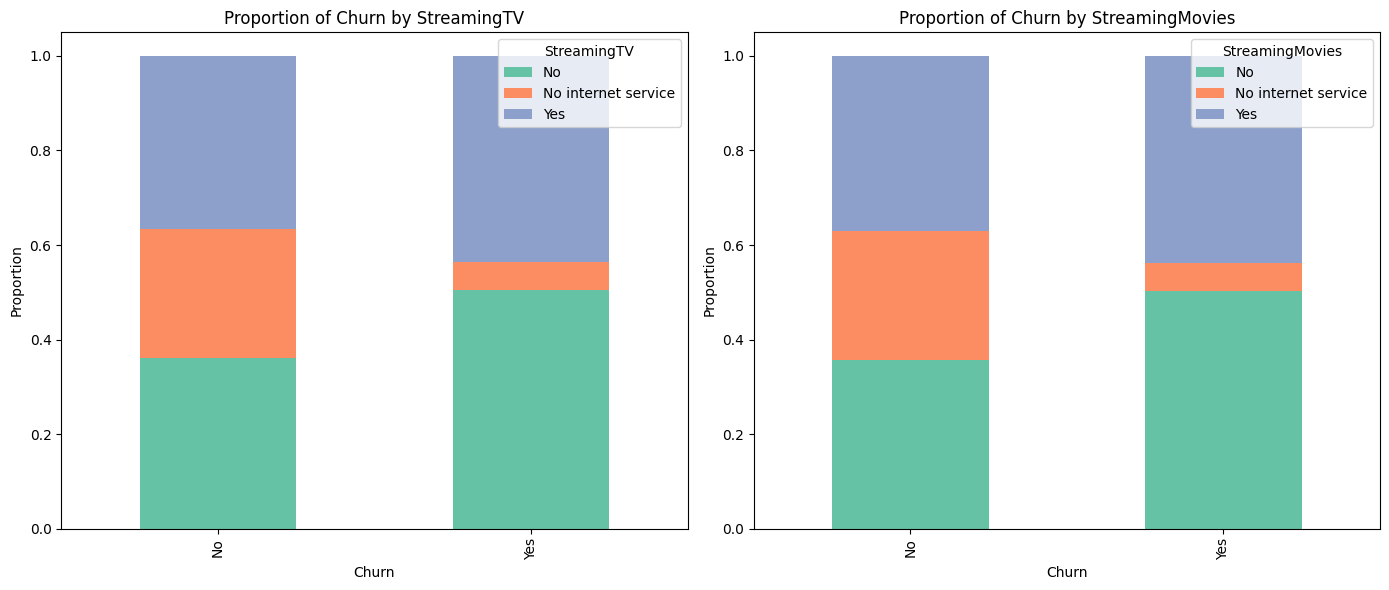

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of columns to plot
columns_to_plot = ['StreamingTV', 'StreamingMovies']

# Create a grid of bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    # Calculate proportions
    crosstab = pd.crosstab(churn_data['Churn'], churn_data[column], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=sns.color_palette("Set2"))
    
    axes[i].set_title(f'Proportion of Churn by {column}')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title=column)

# Adjust layout
plt.tight_layout()
plt.show()

#### Chi-Square Test for Two Categorical Variables

In [24]:
from scipy.stats import chi2_contingency

# List of columns to test
columns_to_test = ['StreamingTV', 'StreamingMovies']

# Perform Chi-square test for each column
for column in columns_to_test:
    # Create a contingency table
    contingency_table = pd.crosstab(churn_data['Churn'], churn_data[column])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results with interpretation
    print(f"Chi-square Test for {column}:")
    print(f"Chi-square Statistic: {chi2:.2f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-value: {p:.4f}")
    
    # Interpretation based on the p-value
    alpha = 0.05  # Common significance level
    if p < alpha:
        print(f"The p-value is less than 0.05, indicating a significant association between Churn and {column}.")
        print(f"This suggests that {column} may influence the likelihood of churn.\n")
    else:
        print(f"The p-value is greater than or equal to 0.05, indicating no significant association between Churn and {column}.")
        print(f"This suggests that {column} may not have a strong influence on churn.\n")

Chi-square Test for StreamingTV:
Chi-square Statistic: 372.46
Degrees of Freedom: 2
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and StreamingTV.
This suggests that StreamingTV may influence the likelihood of churn.

Chi-square Test for StreamingMovies:
Chi-square Statistic: 374.27
Degrees of Freedom: 2
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and StreamingMovies.
This suggests that StreamingMovies may influence the likelihood of churn.



#### Churn by 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod'

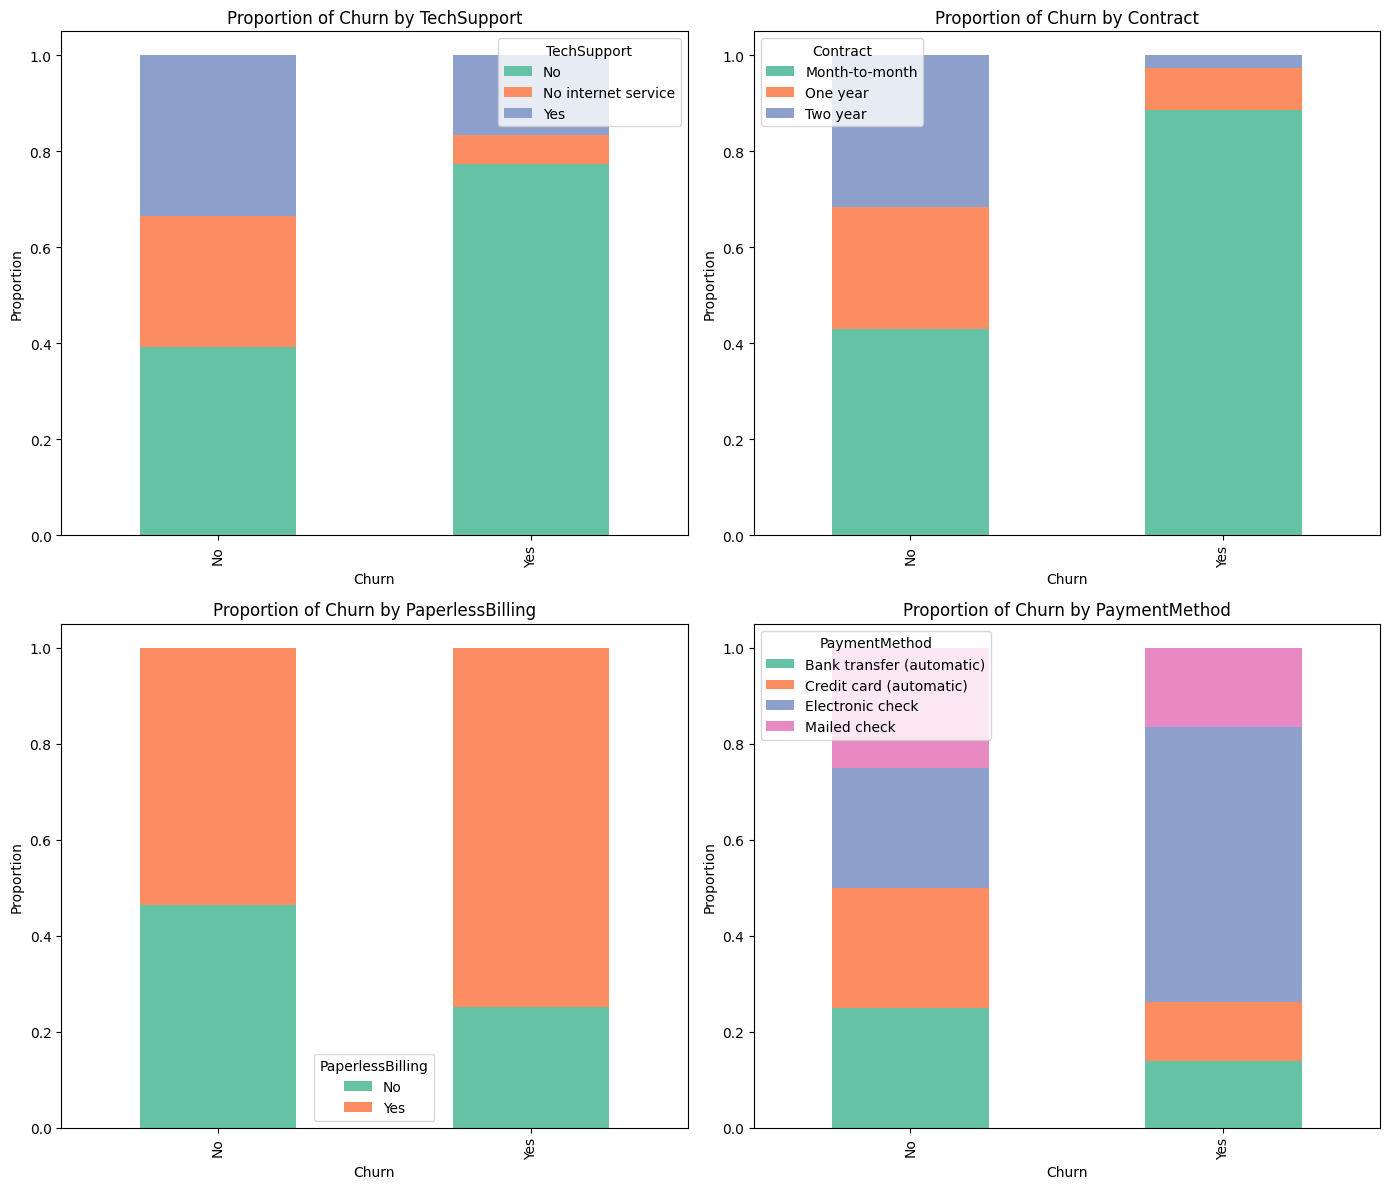

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of columns to plot
columns_to_plot = ['TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create a grid of bar plots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    # Calculate proportions
    crosstab = pd.crosstab(churn_data['Churn'], churn_data[column], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], color=sns.color_palette("Set2"))
    
    axes[i].set_title(f'Proportion of Churn by {column}')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title=column)

# Adjust layout
plt.tight_layout()
plt.show()

#### Chi-Square Test for Two Categorical Variables

In [26]:
from scipy.stats import chi2_contingency

# List of columns to test
columns_to_test = ['Contract', 'TechSupport', 'PaperlessBilling', 'PaymentMethod']

# Perform Chi-square test for each column
for column in columns_to_test:
    # Create a contingency table
    contingency_table = pd.crosstab(churn_data['Churn'], churn_data[column])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results with interpretation
    print(f"Chi-square Test for {column}:")
    print(f"Chi-square Statistic: {chi2:.2f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-value: {p:.4f}")
    
    # Interpretation based on the p-value
    alpha = 0.05  # Common significance level
    if p < alpha:
        print(f"The p-value is less than 0.05, indicating a significant association between Churn and {column}.")
        print(f"This suggests that {column} may influence the likelihood of churn.\n")
    else:
        print(f"The p-value is greater than or equal to 0.05, indicating no significant association between Churn and {column}.")
        print(f"This suggests that {column} may not have a strong influence on churn.\n")

Chi-square Test for Contract:
Chi-square Statistic: 1179.55
Degrees of Freedom: 2
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and Contract.
This suggests that Contract may influence the likelihood of churn.

Chi-square Test for TechSupport:
Chi-square Statistic: 824.93
Degrees of Freedom: 2
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and TechSupport.
This suggests that TechSupport may influence the likelihood of churn.

Chi-square Test for PaperlessBilling:
Chi-square Statistic: 256.87
Degrees of Freedom: 1
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and PaperlessBilling.
This suggests that PaperlessBilling may influence the likelihood of churn.

Chi-square Test for PaymentMethod:
Chi-square Statistic: 645.43
Degrees of Freedom: 3
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn

#### Churn by 'MonthlyCharges', "TotalCharges"

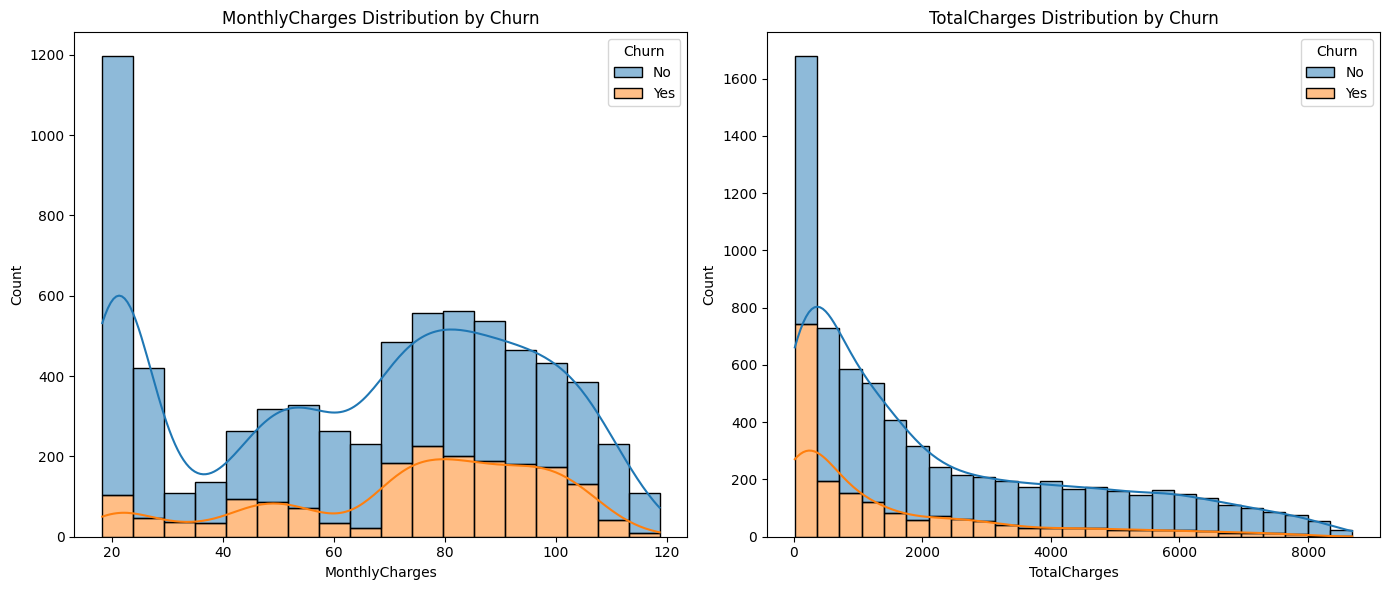

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid plot for MonthlyCharges and TotalCharges distribution by Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot MonthlyCharges distribution
sns.histplot(data=churn_data, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True, ax=axes[0])
axes[0].set_title('MonthlyCharges Distribution by Churn')
axes[0].set_xlabel('MonthlyCharges')
axes[0].set_ylabel('Count')

# Plot TotalCharges distribution
sns.histplot(data=churn_data, x='TotalCharges', hue='Churn', multiple='stack', kde=True, ax=axes[1])
axes[1].set_title('TotalCharges Distribution by Churn')
axes[1].set_xlabel('TotalCharges')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

#### ANOVA test comparing the average MonthlyCharges, TotalCharges across different Churn types

In [28]:
from scipy.stats import f_oneway

# Extract the MonthlyCharges and TotalCharges values for each Churn type
churn_yes_monthly = churn_data[churn_data['Churn'] == 'Yes']['MonthlyCharges']
churn_no_monthly = churn_data[churn_data['Churn'] == 'No']['MonthlyCharges']

churn_yes_total = churn_data[churn_data['Churn'] == 'Yes']['TotalCharges']
churn_no_total = churn_data[churn_data['Churn'] == 'No']['TotalCharges']

# Perform ANOVA for MonthlyCharges
f_stat_monthly, p_value_monthly = f_oneway(churn_yes_monthly, churn_no_monthly)

# Perform ANOVA for TotalCharges
f_stat_total, p_value_total = f_oneway(churn_yes_total, churn_no_total)

# Print results with interpretation for MonthlyCharges
print(f"ANOVA for MonthlyCharges:")
print(f"F-statistic: {f_stat_monthly:.2f}")
print(f"p-value: {p_value_monthly:.4f}")

# Interpretation based on the p-value
alpha = 0.05  # Common significance level
if p_value_monthly < alpha:
    print("The p-value is less than 0.05, indicating a significant difference in MonthlyCharges between churned and non-churned customers.")
else:
    print("The p-value is greater than or equal to 0.05, indicating no significant difference in MonthlyCharges between churned and non-churned customers.")

# Print results with interpretation for TotalCharges
print(f"\nANOVA for TotalCharges:")
print(f"F-statistic: {f_stat_total:.2f}")
print(f"p-value: {p_value_total:.4f}")

# Interpretation based on the p-value
if p_value_total < alpha:
    print("The p-value is less than 0.05, indicating a significant difference in TotalCharges between churned and non-churned customers.")
else:
    print("The p-value is greater than or equal to 0.05, indicating no significant difference in TotalCharges between churned and non-churned customers.")

ANOVA for MonthlyCharges:
F-statistic: 271.58
p-value: 0.0000
The p-value is less than 0.05, indicating a significant difference in MonthlyCharges between churned and non-churned customers.

ANOVA for TotalCharges:
F-statistic: 291.34
p-value: 0.0000
The p-value is less than 0.05, indicating a significant difference in TotalCharges between churned and non-churned customers.


### Feature Extending

#### Service Counts

In [29]:
# Define a function to count the number of services subscribed
def count_services(row):
    count = 0
    if row['PhoneService'] == 'Yes':
        count += 1
    if row['MultipleLines'] == 'Yes':
        count += 1
    if row['InternetService'] in ['DSL', 'Fiber optic']:
        count += 1
    return count

# Apply the function to each row and create a new column 'ServiceCount'
churn_data['ServiceCount'] = churn_data.apply(count_services, axis=1)

# Display the first few rows of the updated DataFrame
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ServiceCount
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2


<Figure size 1000x600 with 0 Axes>

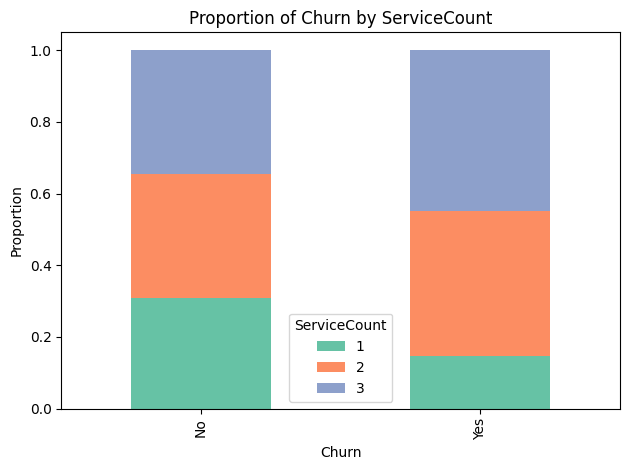

In [63]:
# Calculate proportions
crosstab = pd.crosstab(churn_data['Churn'], churn_data['ServiceCount'], normalize='index')

# Create a bar plot for ServiceCount
plt.figure(figsize=(10, 6))
crosstab.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"))

# Add titles and labels
plt.title('Proportion of Churn by ServiceCount')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.legend(title='ServiceCount')

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
from scipy.stats import chi2_contingency

# List of columns to test
columns_to_test = ['ServiceCount']

# Perform Chi-square test for each column
for column in columns_to_test:
    # Create a contingency table
    contingency_table = pd.crosstab(churn_data['Churn'], churn_data[column])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results with interpretation
    print(f"Chi-square Test for {column}:")
    print(f"Chi-square Statistic: {chi2:.2f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-value: {p:.4f}")
    
    # Interpretation based on the p-value
    alpha = 0.05  # Common significance level
    if p < alpha:
        print(f"The p-value is less than 0.05, indicating a significant association between Churn and {column}.")
        print(f"This suggests that {column} may influence the likelihood of churn.\n")
    else:
        print(f"The p-value is greater than or equal to 0.05, indicating no significant association between Churn and {column}.")
        print(f"This suggests that {column} may not have a strong influence on churn.\n")

Chi-square Test for ServiceCount:
Chi-square Statistic: 186.96
Degrees of Freedom: 2
p-value: 0.0000
The p-value is less than 0.05, indicating a significant association between Churn and ServiceCount.
This suggests that ServiceCount may influence the likelihood of churn.



### Data Preprocessing for Predictive Modeling

#### LabelEncoding for binary variables like SeniorCitizen, Gender, and One-Hot-Encoding for other categorical columns

In [30]:
import pandas as pd

# Define the columns to encode
columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'Contract', 'PaymentMethod']

# Create dummy variables for the specified columns
churn_data_encoded = pd.get_dummies(churn_data, columns=columns, drop_first=True)

# Convert only the dummy-encoded columns to integers
dummy_columns = churn_data_encoded.columns.difference(churn_data.columns)
churn_data_encoded[dummy_columns] = churn_data_encoded[dummy_columns].astype(int)

# Display the first few rows of the updated DataFrame
churn_data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,...,0,0,0,0,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,56.95,1889.50,No,...,0,0,0,0,0,1,0,0,0,1
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,...,0,0,0,0,0,0,0,0,0,1
3,Male,0,No,No,45,No,No,42.30,1840.75,No,...,1,0,0,0,0,1,0,0,0,0
4,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes,...,0,0,0,0,0,0,0,0,1,0


In [31]:
from sklearn.preprocessing import LabelEncoder

# List of binary categorical columns to encode
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Apply label encoding to the specified columns
for column in binary_columns:
    churn_data_encoded[column] = LabelEncoder().fit_transform(churn_data_encoded[column])

# Display the first few rows of the updated DataFrame
churn_data_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [32]:
churn_data_encoded.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'ServiceCount', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

#### Calculate Correlation to Churn

In [33]:
churn_data_encoded.corr()['Churn'].sort_values(ascending = False)

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
ServiceCount                             0.147730
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender                                  -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport_Yes                         -0.164716


#### Multicollinearity Analysis

In [34]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Drop the "Churn" column
churn_data_vif = churn_data_encoded.drop(columns=['Churn'])

# Drop rows with NaN values
churn_data_vif_clean = churn_data_vif.dropna()

# Add a constant column for the intercept
X = add_constant(churn_data_vif_clean)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

/opt/anaconda3/envs/COS243/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/envs/COS243/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  Feature         VIF
0                                   const    0.000000
1                                  gender    1.002106
2                           SeniorCitizen    1.153220
3                                 Partner    1.462988
4                              Dependents    1.381598
5                                  tenure    7.584453
6                            PhoneService         inf
7                        PaperlessBilling    1.208455
8                          MonthlyCharges  866.089640
9                            TotalCharges   10.811490
10                           ServiceCount         inf
11         MultipleLines_No phone service         inf
12                      MultipleLines_Yes         inf
13            InternetService_Fiber optic  148.500814
14                     InternetService_No         inf
15     OnlineSecurity_No internet service         inf
16                     OnlineSecurity_Yes    6.338349
17       OnlineBackup_No int

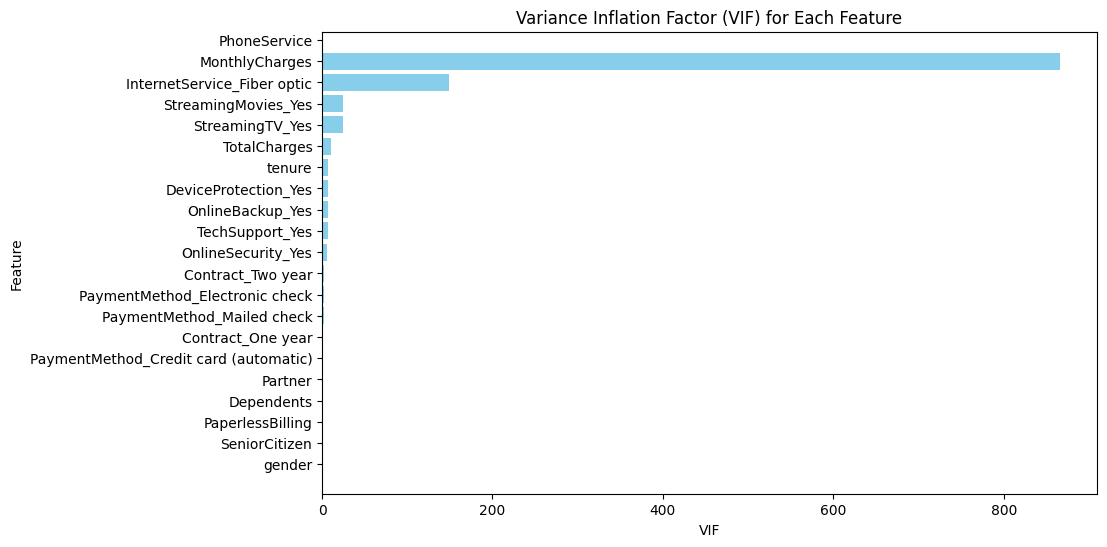

In [68]:
# Drop the constant column from the VIF data
vif_data = vif_data[vif_data['Feature'] != 'const']

# Sort the VIF values in descending order
vif_data = vif_data.sort_values(by='VIF', ascending=False)

# Create a bar plot to visualize the VIF values
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'], color='skyblue')
plt.xlabel('VIF')
plt.ylabel('Feature')
plt.title('Variance Inflation Factor (VIF) for Each Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest VIF at the top
plt.show()

#### ANOVA F-Test

                                  Feature      F-Value        p-Value
4                                  tenure  1007.509431  9.437650e-207
12            InternetService_Fiber optic   733.951530  7.887445e-154
27                      Contract_Two year   703.210304  9.155159e-148
29         PaymentMethod_Electronic check   702.709162  1.150100e-147
16       OnlineBackup_No internet service   383.981781   2.735823e-83
20        TechSupport_No internet service   383.981781   2.735823e-83
24    StreamingMovies_No internet service   383.981781   2.735823e-83
18   DeviceProtection_No internet service   383.981781   2.735823e-83
22        StreamingTV_No internet service   383.981781   2.735823e-83
13                     InternetService_No   383.981781   2.735823e-83
14     OnlineSecurity_No internet service   383.981781   2.735823e-83
8                            TotalCharges   291.344862   4.876866e-64
7                          MonthlyCharges   271.576990   6.760843e-60
6                   

/opt/anaconda3/envs/COS243/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


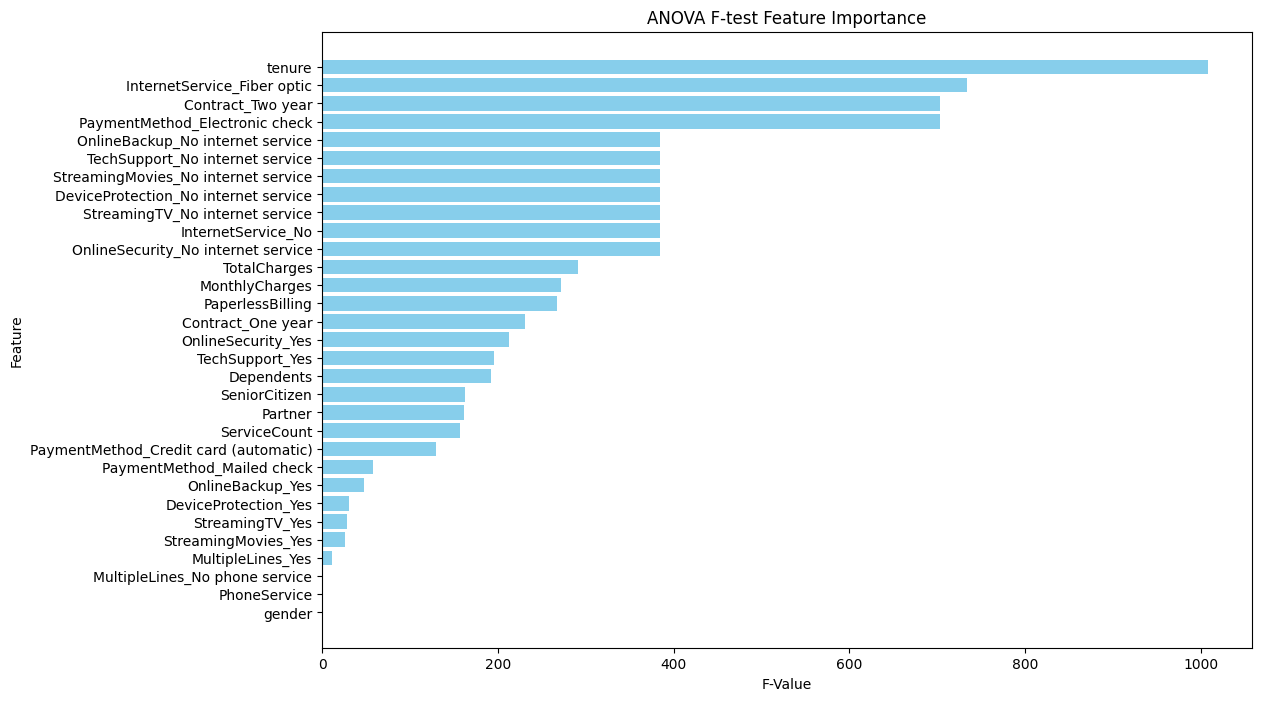

In [ ]:
from sklearn.feature_selection import f_classif

# Drop the "Churn" column
churn_data_anova_X = churn_data_encoded.drop(columns=['Churn'])

# Apply the ANOVA F-test on the training set
f_values, p_values = f_classif(churn_data_anova_X, churn_data_encoded[['Churn']])

# Create a DataFrame to display the F-values and p-values
feature_names = churn_data_anova_X.columns
anova_df = pd.DataFrame({
    'Feature': feature_names,
    'F-Value': f_values,
    'p-Value': p_values
})

# Sort the features by F-value in descending order
anova_df = anova_df.sort_values(by='F-Value', ascending=False)

# Display the ranked features
print(anova_df)

# Plot the F-values
plt.figure(figsize=(12, 8))
plt.barh(anova_df['Feature'], anova_df['F-Value'], color='skyblue')
plt.xlabel('F-Value')
plt.ylabel('Feature')
plt.title('ANOVA F-test Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest F-value at the top
plt.show()

In [98]:
# Drop the specified features
features_to_remove = ['MultipleLines_Yes', 'PhoneService', 
                      'MonthlyCharges', 'gender', 
                      'InternetService_No']
churn_data_filtered = churn_data_encoded.drop(columns=features_to_remove)

In [101]:
# Display the column names of churn_data_filtered
churn_data_filtered.shape

(7032, 27)

/opt/anaconda3/envs/COS243/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                  Feature      F-Value        p-Value
3                                  tenure  1007.509431  9.437650e-207
8             InternetService_Fiber optic   733.951530  7.887445e-154
22                      Contract_Two year   703.210304  9.155159e-148
24         PaymentMethod_Electronic check   702.709162  1.150100e-147
13   DeviceProtection_No internet service   383.981781   2.735823e-83
9      OnlineSecurity_No internet service   383.981781   2.735823e-83
11       OnlineBackup_No internet service   383.981781   2.735823e-83
19    StreamingMovies_No internet service   383.981781   2.735823e-83
17        StreamingTV_No internet service   383.981781   2.735823e-83
15        TechSupport_No internet service   383.981781   2.735823e-83
5                            TotalCharges   291.344862   4.876866e-64
4                        PaperlessBilling   267.487636   4.879248e-59
21                      Contract_One year   230.627733   2.814329e-51
10                  

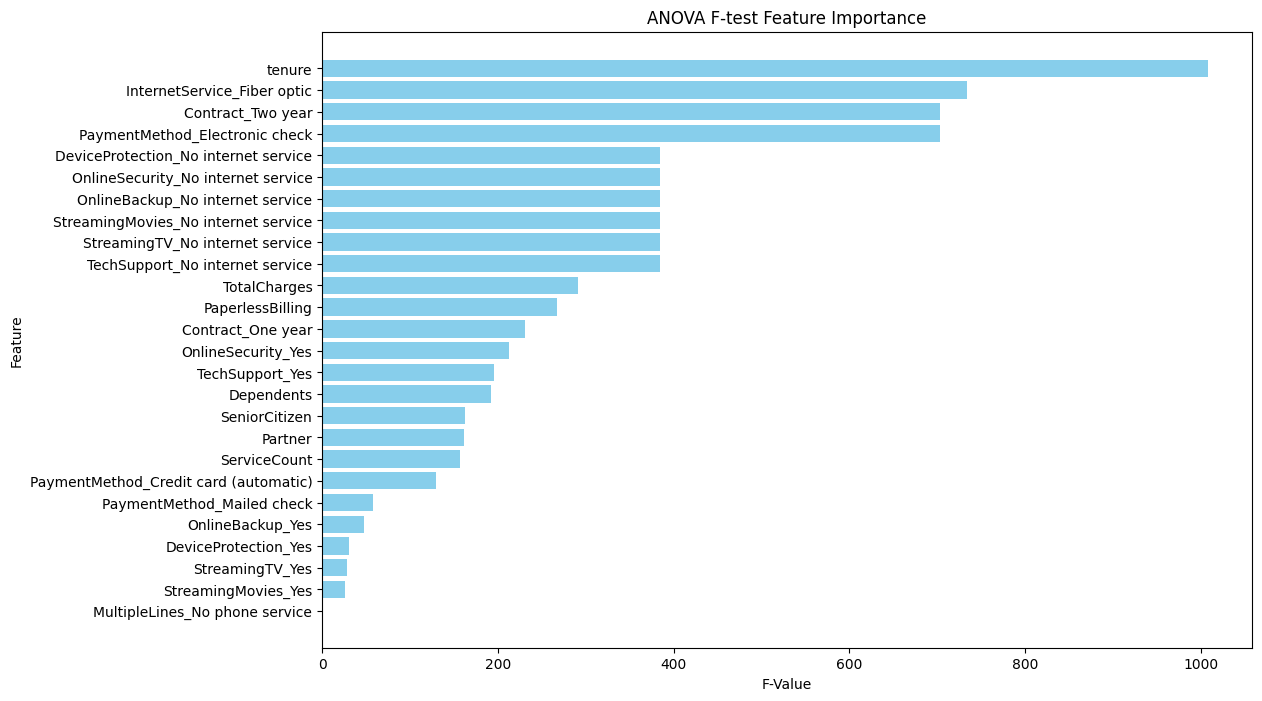

In [118]:
from sklearn.feature_selection import f_classif

# Drop the "Churn" column
churn_data_anova_X = churn_data_filtered.drop(columns=['Churn'])

# Apply the ANOVA F-test on the training set
f_values, p_values = f_classif(churn_data_anova_X, churn_data_filtered[['Churn']])

# Create a DataFrame to display the F-values and p-values
feature_names = churn_data_anova_X.columns
anova_df = pd.DataFrame({
    'Feature': feature_names,
    'F-Value': f_values,
    'p-Value': p_values
})

# Sort the features by F-value in descending order
anova_df = anova_df.sort_values(by='F-Value', ascending=False)

# Display the ranked features
print(anova_df)

# Plot the F-values
plt.figure(figsize=(12, 8))
plt.barh(anova_df['Feature'], anova_df['F-Value'], color='skyblue')
plt.xlabel('F-Value')
plt.ylabel('Feature')
plt.title('ANOVA F-test Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest F-value at the top
plt.show()

### Predictive Modeling

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#### Normalize tenure, TotalCharges

In [73]:
numerical_columns = ['tenure', 'TotalCharges']
scaler = StandardScaler()
churn_data_filtered[numerical_columns] = scaler.fit_transform(churn_data_filtered[numerical_columns])

In [102]:
churn_data_filtered

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,TotalCharges,Churn,ServiceCount,MultipleLines_No phone service,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.280248,1,-0.994194,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0.064303,0,-0.173740,0,2,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,-1.239504,1,-0.959649,1,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0.512486,0,-0.195248,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,-1.239504,1,-0.940457,1,2,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,-0.343137,1,-0.129180,0,3,0,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,1.612573,1,2.241056,0,3,0,1,...,0,0,1,0,1,1,0,1,0,0
7040,0,1,1,-0.872808,1,-0.854514,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,0,-1.158016,1,-0.872095,1,3,0,1,...,0,0,0,0,0,0,0,0,0,1


In [106]:
x = churn_data_filtered.drop(columns = ['Churn'])
y = churn_data_filtered['Churn'].values

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=45)

In [107]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to the majority class
rus = RandomUnderSampler(random_state=42)
xtrain_resampled, ytrain_resampled = rus.fit_resample(xtrain, ytrain)

#### Random Forest Classifier

In [108]:
model = RandomForestClassifier(random_state=42)
model.fit(xtrain_resampled, ytrain_resampled)

y_pred = model.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1293
           1       0.50      0.70      0.59       465

    accuracy                           0.74      1758
   macro avg       0.69      0.73      0.70      1758
weighted avg       0.78      0.74      0.75      1758



#### XGBoost

In [109]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)

# Fit the model
xgb_model.fit(xtrain_resampled, ytrain_resampled)

# Make predictions
y_pred_xgb = xgb_model.predict(xtest)

print("Classification Report:")
print(classification_report(ytest, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1293
           1       0.50      0.70      0.59       465

    accuracy                           0.74      1758
   macro avg       0.69      0.73      0.70      1758
weighted avg       0.78      0.74      0.75      1758



#### Catboost

In [110]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.2,
    depth=7,
    random_seed=42,
    verbose=0  # Suppress output
)

# Fit the model
catboost_model.fit(xtrain_resampled, ytrain_resampled)

# Make predictions
y_pred_catboost = catboost_model.predict(xtest)

print("Classification Report:")
print(classification_report(ytest, y_pred_catboost))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1293
           1       0.51      0.72      0.60       465

    accuracy                           0.74      1758
   macro avg       0.70      0.74      0.71      1758
weighted avg       0.78      0.74      0.76      1758



                                  Feature  Importance
9      OnlineSecurity_No internet service    0.044986
13   DeviceProtection_No internet service    0.238012
15        TechSupport_No internet service    0.294256
17        StreamingTV_No internet service    0.496215
11       OnlineBackup_No internet service    0.663707
19    StreamingMovies_No internet service    0.770205
7          MultipleLines_No phone service    1.764176
18                        StreamingTV_Yes    2.582583
14                   DeviceProtection_Yes    2.639037
0                           SeniorCitizen    2.656112
10                     OnlineSecurity_Yes    2.678354
25             PaymentMethod_Mailed check    2.930807
23  PaymentMethod_Credit card (automatic)    2.992645
20                    StreamingMovies_Yes    3.211644
2                              Dependents    3.547765
6                            ServiceCount    3.581621
24         PaymentMethod_Electronic check    3.619045
12                       Onl

<Figure size 1000x600 with 0 Axes>

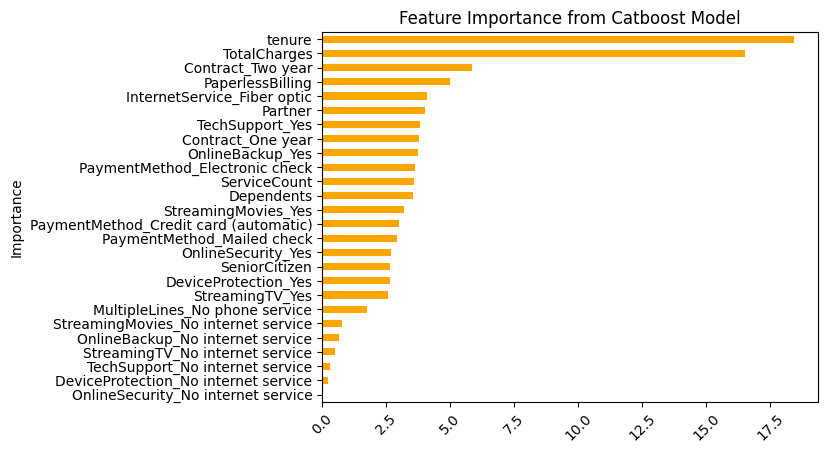

In [116]:
# Feature Importance from Catboost Model
import matplotlib.pyplot as plt
feature_importances = catboost_model.feature_importances_

feature_names = xtrain_resampled.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)
print(importance_df)

#plot
plt.figure(figsize=(10, 6))
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, color='orange')
plt.title('Feature Importance from Catboost Model')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

#### Logistic Regression 

In [129]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(xtrain_resampled, ytrain_resampled)

# Make predictions
y_pred_logreg = logreg_model.predict(xtest)

print("Classification Report:")
print(classification_report(ytest, y_pred_logreg))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1293
           1       0.51      0.77      0.62       465

    accuracy                           0.75      1758
   macro avg       0.71      0.75      0.71      1758
weighted avg       0.80      0.75      0.76      1758



#### Feature Coefficients from LR Model

                                  Feature  Coefficient  Absolute Coefficient
14                   DeviceProtection_Yes    -0.000748              0.000748
2                              Dependents     0.078167              0.078167
1                                 Partner    -0.082562              0.082562
20                    StreamingMovies_Yes     0.125362              0.125362
19    StreamingMovies_No internet service    -0.126520              0.126520
17        StreamingTV_No internet service    -0.126520              0.126520
15        TechSupport_No internet service    -0.126520              0.126520
9      OnlineSecurity_No internet service    -0.126520              0.126520
11       OnlineBackup_No internet service    -0.126520              0.126520
13   DeviceProtection_No internet service    -0.126520              0.126520
6                            ServiceCount     0.140521              0.140521
12                       OnlineBackup_Yes    -0.165888              0.165888

<Figure size 1000x600 with 0 Axes>

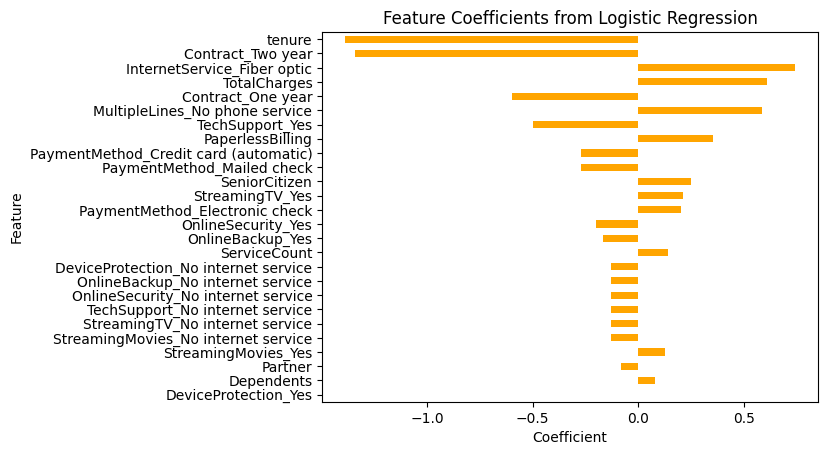

In [130]:
import pandas as pd

# Extract the coefficients
coefficients = logreg_model.coef_[0]

# Create a DataFrame to display the coefficients
feature_names = xtrain_resampled.columns
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of the coefficients
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=True)

# Display the coefficients
print(coefficients_df)

# Plot the coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
coefficients_df.plot(kind='barh', x='Feature', y='Coefficient', legend=False, color='orange')
plt.title('Feature Coefficients from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

### Model Performance Improvement

#### K Important Features with Cross Validation

Average Recall over the top 1 important features: 0.75
Average Recall over the top 2 important features: 0.77
Average Recall over the top 3 important features: 0.80
Average Recall over the top 4 important features: 0.75
Average Recall over the top 5 important features: 0.79
Average Recall over the top 6 important features: 0.79
Average Recall over the top 7 important features: 0.79
Average Recall over the top 8 important features: 0.79
Average Recall over the top 9 important features: 0.79
Average Recall over the top 10 important features: 0.79
Average Recall over the top 11 important features: 0.80
Average Recall over the top 12 important features: 0.79
Average Recall over the top 13 important features: 0.81
Average Recall over the top 14 important features: 0.81
Average Recall over the top 15 important features: 0.80
Average Recall over the top 16 important features: 0.80
Average Recall over the top 17 important features: 0.80
Average Recall over the top 18 important features: 0.80
A

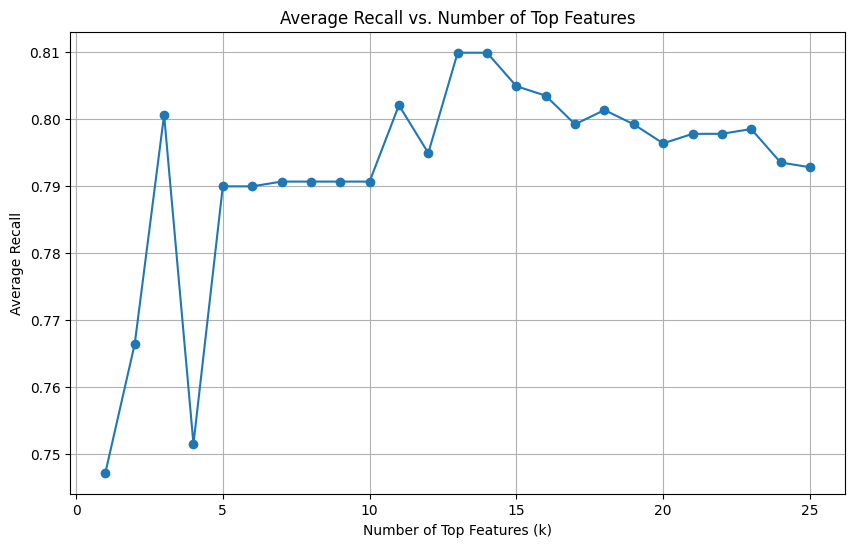

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Iterate over k from 1 to 32 and calculate the average recall

num_columns = xtrain_resampled.shape[1]
k_values = range(1, num_columns)
average_recalls = []

for k in k_values:
    # Select the top k important features
    top_k_features = anova_df['Feature'].head(k).tolist()
    
    # Subset the training data to include only the top k features
    X_train_top_k = xtrain_resampled[top_k_features]
    
    # Perform cross-validation and calculate the average recall
    cv_scores = cross_val_score(logreg_model, X_train_top_k, ytrain_resampled, cv=5, scoring='recall')
    average_recall = np.mean(cv_scores)
    average_recalls.append(average_recall)

    print(f"Average Recall over the top {k} important features: {average_recall:.2f}")

# Plot the average accuracy for each value of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_recalls, marker='o')
plt.xlabel('Number of Top Features (k)')
plt.ylabel('Average Recall')
plt.title('Average Recall vs. Number of Top Features')
plt.grid(True)
plt.show()

In [123]:
# Select the top 14 important features
k = 13
top_k_features = anova_df['Feature'].head(k).tolist()

# Subset the training data to include only the top 14 features
X_train_top_k = xtrain_resampled[top_k_features]

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Perform cross-validation and calculate the average recall
cv_scores = cross_val_score(logreg_model, X_train_top_k, ytrain_resampled, cv=5, scoring='recall')
average_recall = np.mean(cv_scores)

print(f"Average Recall with top {k} important features: {average_recall:.2f}")

# Train the model on the training data
logreg_model.fit(X_train_top_k, ytrain_resampled)

# Subset the testing data to include only the top 14 features
X_test_top_k = xtest[top_k_features]

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_top_k)

# Print classification report
print("Classification Report:")
print(classification_report(ytest, y_pred))

Average Recall with top 13 important features: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1293
           1       0.51      0.78      0.62       465

    accuracy                           0.75      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.75      0.76      1758



### Customer Success Score

#### Calculate Customer Success Score

In [ ]:
# Extract the coefficients from the logistic regression model
coefficients = logreg_model.coef_[0]
intercept = logreg_model.intercept_[0]

# Calculate the customer success score for each customer by flipping the sign of the churn score
customer_success_score = -(intercept + np.dot(x, coefficients))

# Add the customer success score to the DataFrame
churn_data_filtered['customer_success_score'] = customer_success_score

# Display the first few rows of the updated DataFrame
churn_data_filtered.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,TotalCharges,Churn,ServiceCount,MultipleLines_No phone service,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_success_score,churn_score
0,0,1,0,-1.280248,1,-0.994194,0,1,1,0,...,0,0,0,0,0,0,1,0,-1.354613,1.354613
1,0,0,0,0.064303,0,-0.173740,0,2,0,0,...,0,0,0,1,0,0,0,1,1.842629,-1.842629
2,0,0,0,-1.239504,1,-0.959649,1,2,0,0,...,0,0,0,0,0,0,0,1,-0.284455,0.284455
3,0,0,0,0.512486,0,-0.195248,0,1,1,0,...,0,0,0,1,0,0,0,0,2.263384,-2.263384
4,0,0,0,-1.239504,1,-0.940457,1,2,0,1,...,0,0,0,0,0,0,1,0,-1.879000,1.879000


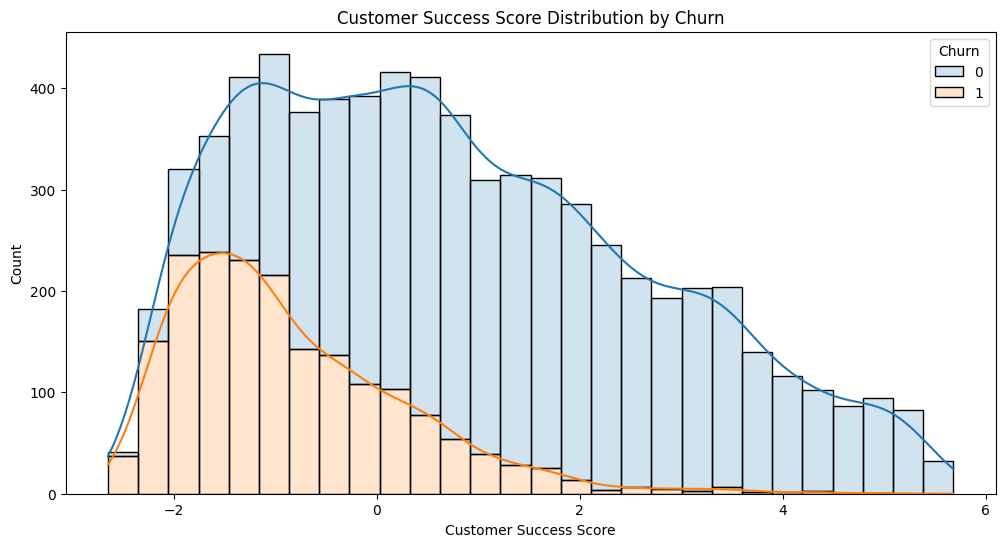

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of customer_success_score for Churn=1 and Churn=0 with more transparent colors
plt.figure(figsize=(12, 6))
sns.histplot(data=churn_data_filtered, x='customer_success_score', hue='Churn', multiple='stack', kde=True, alpha=0.2)
plt.title('Customer Success Score Distribution by Churn')
plt.xlabel('Customer Success Score')
plt.ylabel('Count')
plt.show()

In [160]:
import pandas as pd

# Assuming 'filtered_churn_data' is your DataFrame with the relevant data

# Create bins for customer_success_score
bins = [-float('inf'), 0, 2, float('inf')]
labels = ['<0', '0-2', '>=2']
churn_data_filtered['score_group'] = pd.cut(churn_data_filtered['customer_success_score'], bins=bins, labels=labels)

# Group by score_group and calculate counts and churn proportions
grouped_data = churn_data_filtered.groupby('score_group').agg(
    customer_count=('customer_success_score', 'size'),
    churn_count=('Churn', 'sum')
).reset_index()

# Calculate churn proportion
grouped_data['churn_proportion'] = grouped_data['churn_count'] / grouped_data['customer_count']

# Display the grouped data
print(grouped_data)

  score_group  customer_count  churn_count  churn_proportion
0          <0            2861         1486          0.519399
1         0-2            2357          348          0.147645
2         >=2            1814           35          0.019294


/var/folders/7q/0pgbgf_52n58ml7cghywyjdr0000gn/T/ipykernel_4371/3668485832.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = churn_data_filtered.groupby('score_group').agg(


#### Customer Success Score Normalization

In [144]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler with the desired range
scaler = MinMaxScaler(feature_range=(-100, 100))

# Reshape the customer success score to fit the scaler
customer_success_score_reshaped = customer_success_score.reshape(-1, 1)

# Fit and transform the customer success score
normalized_success_score = scaler.fit_transform(customer_success_score_reshaped)

# Flatten the normalized success score array
normalized_success_score = normalized_success_score.flatten()

# Add the normalized success score to the DataFrame
churn_data_filtered['normalized_success_score'] = normalized_success_score

# Display the first few rows of the updated DataFrame
churn_data_filtered.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,TotalCharges,Churn,ServiceCount,MultipleLines_No phone service,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customer_success_score,churn_score,normalized_success_score
0,0,1,0,-1.280248,1,-0.994194,0,1,1,0,...,0,0,0,0,0,1,0,-1.354613,1.354613,-68.884354
1,0,0,0,0.064303,0,-0.173740,0,2,0,0,...,0,0,1,0,0,0,1,1.842629,-1.842629,7.861543
2,0,0,0,-1.239504,1,-0.959649,1,2,0,0,...,0,0,0,0,0,0,1,-0.284455,0.284455,-43.196506
3,0,0,0,0.512486,0,-0.195248,0,1,1,0,...,0,0,1,0,0,0,0,2.263384,-2.263384,17.961252
4,0,0,0,-1.239504,1,-0.940457,1,2,0,1,...,0,0,0,0,0,1,0,-1.879000,1.879000,-81.471619


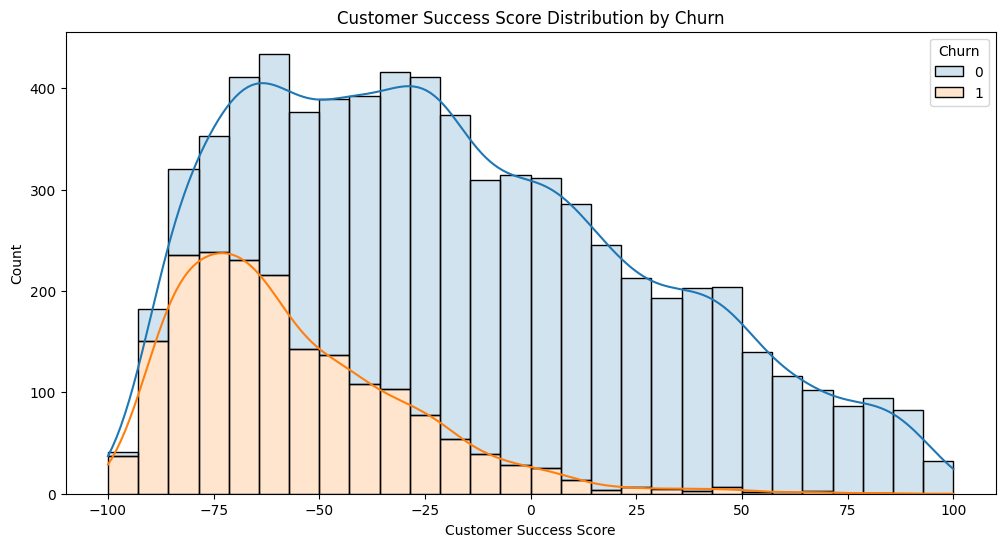

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of customer_success_score for Churn=1 and Churn=0 with more transparent colors
plt.figure(figsize=(12, 6))
sns.histplot(data=churn_data_filtered, x='normalized_success_score', hue='Churn', multiple='stack', kde=True, alpha=0.2)
plt.title('Customer Success Score Distribution by Churn')
plt.xlabel('Customer Success Score')
plt.ylabel('Count')
plt.show()